# Fiji

In [3]:
import pandas as pd  
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

df= pd.read_excel("fijipopulation.xlsx") 
df

,Year,Population
0,2023,936375
1,2022,929766
2,2020,920422
3,2015,917200
4,2010,905169
5,2005,874923
6,2000,832509
7,1995,792246
8,1990,780430
9,1985,727461


In [4]:
# Remove NaN rows from the DataFrame
df1 = df.dropna()

# Filter the new data to include only the years from 2010 onwards
df_clean = df1[df1['Year'] >= 2010]

# Prepare the features (X) and target (y) variables
X = df_clean[['Year']]
y = df_clean['Population']

In [9]:
# Initialize the linear regression model
lr_model = LinearRegression()

# Fit the model to the data
lr_model.fit(X, y)

# Generate predictions for the next 10 years
future_years = np.array([[year] for year in range(2024, 2034)])
future_population = lr_model.predict(future_years)
future_population = np.round(future_population).astype(int)

# Create a DataFrame to display the predictions
future_df = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Population': future_population})

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


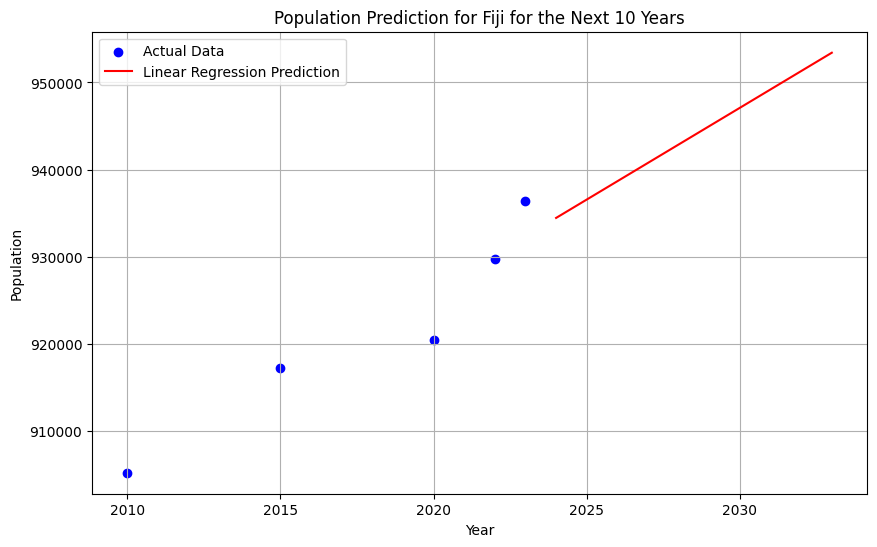

,Year,Predicted Population
0,2024,934439
1,2025,936548
2,2026,938656
3,2027,940765
4,2028,942874
5,2029,944983
6,2030,947091
7,2031,949200
8,2032,951309
9,2033,953417


In [10]:
# Plot the actual data and the linear regression model
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Actual Data', color='blue')
plt.plot(future_years, future_population, label='Linear Regression Prediction', color='red')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Prediction for Fiji for the Next 10 Years')
plt.legend()
plt.grid(True)
plt.show()

future_df

#### 97% of arrivals are in NAN

## Agent Based Model-Nadi International Airport (NAN)

In [11]:
from mesa import Agent, Model
from mesa.space import MultiGrid
from mesa.time import RandomActivation
import random

#### Define the Agent Class

In [26]:
class AirportAgent(Agent):
    def __init__(self, unique_id, model, foreigner):
        super().__init__(unique_id, model)
        self.foreigner = foreigner
        self.state = "Infected" if foreigner and random.random() < 0.10 else "Healthy"
        self.infection_distance = 1  # You can modify this value to change the "contact" distance

    def step(self):
        # Movement
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False
        )
        new_position = random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

        # Recovery for Infected agents
        if self.state == "Infected" and random.random() < 0.70:
            self.state = "Recovered"

        # Infection
        if self.state == "Healthy":
            cellmates = self.model.grid.get_cell_list_contents([self.pos])
            if any(agent.state == "Infected" for agent in cellmates):
                if random.random() < 0.70:
                    self.state = "Infected"

#### Define the Model Class

In [27]:
class AirportModel(Model):
    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)
        
        #We have a population of 3,000 agents per day 13% are local people, and 87% are foreigners.
        for i in range(self.num_agents):
            foreigner = random.random() > 0.13
            agent = AirportAgent(i, self, foreigner)
            self.schedule.add(agent)
            
            # Place agent randomly in the airport
            x = random.randrange(self.grid.width)
            y = random.randrange(self.grid.height)
            self.grid.place_agent(agent, (x, y))

    def step(self):
        self.schedule.step()

#### Run the Simulation and Plot the Results

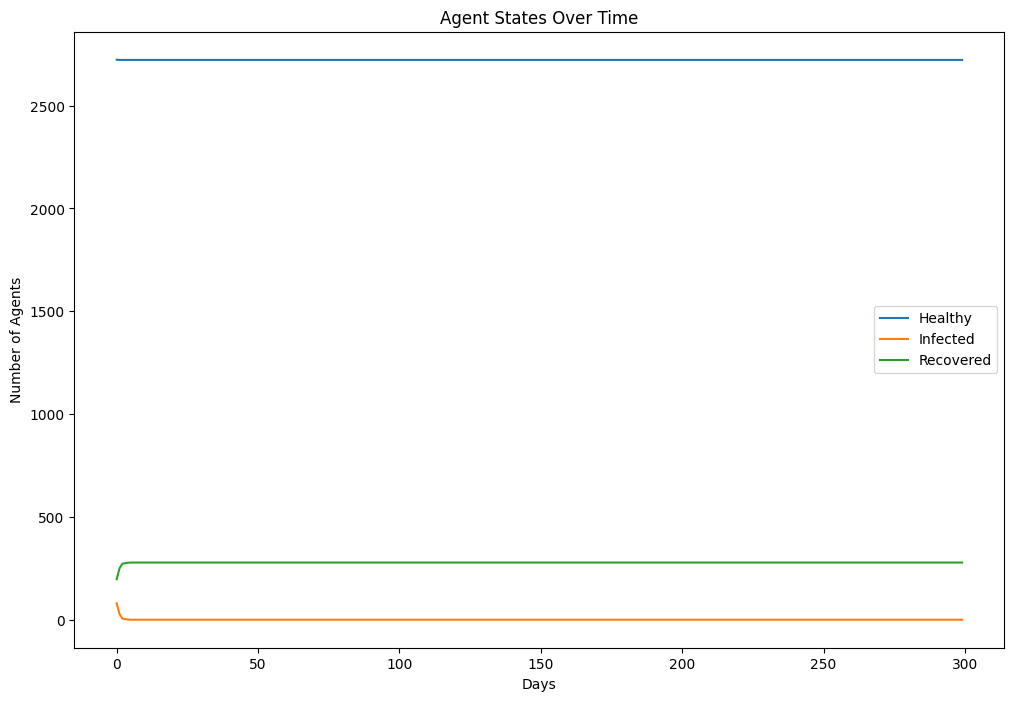

In [28]:
import matplotlib.pyplot as plt

# Initialize the model
model = AirportModel(3000, 46, 2136)

# Initialize lists to hold data
healthy_count = []
infected_count = []
recovered_count = []

# Run the model and collect data
for i in range(300):  # Run for 100 days
    model.step()
    
    # Collect the current state of each agent
    agent_states = [agent.state for agent in model.schedule.agents]
    
    # Count the number of agents in each state and append to lists
    healthy_count.append(agent_states.count("Healthy"))
    infected_count.append(agent_states.count("Infected"))
    recovered_count.append(agent_states.count("Recovered"))

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(healthy_count, label='Healthy')
plt.plot(infected_count, label='Infected')
plt.plot(recovered_count, label='Recovered')
plt.title("Agent States Over Time")
plt.xlabel("Days")
plt.ylabel("Number of Agents")
plt.legend()
plt.show()

## Agent Based Model-Nausori International Airport (SUV)

#### Define the Agent Class

In [31]:
class AirportAgent(Agent):
    def __init__(self, unique_id, model, foreigner):
        super().__init__(unique_id, model)
        self.foreigner = foreigner
        self.state = "Infected" if foreigner and random.random() < 0.10 else "Healthy"
        self.infection_distance = 1  # You can modify this value to change the "contact" distance

    def step(self):
        # Movement
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False
        )
        new_position = random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

        # Recovery for Infected agents
        if self.state == "Infected" and random.random() < 0.70:
            self.state = "Recovered"

        # Infection
        if self.state == "Healthy":
            cellmates = self.model.grid.get_cell_list_contents([self.pos])
            if any(agent.state == "Infected" for agent in cellmates):
                if random.random() < 0.70:
                    self.state = "Infected"

#### Define the Model Class

In [32]:
class AirportModel(Model):
    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)
        
        #We have a population of 3,000 agents per day 13% are local people, and 87% are foreigners.
        for i in range(self.num_agents):
            foreigner = random.random() > 0.13
            agent = AirportAgent(i, self, foreigner)
            self.schedule.add(agent)
            
            # Place agent randomly in the airport
            x = random.randrange(self.grid.width)
            y = random.randrange(self.grid.height)
            self.grid.place_agent(agent, (x, y))

    def step(self):
        self.schedule.step()

#### Run the Simulation and Plot the Results

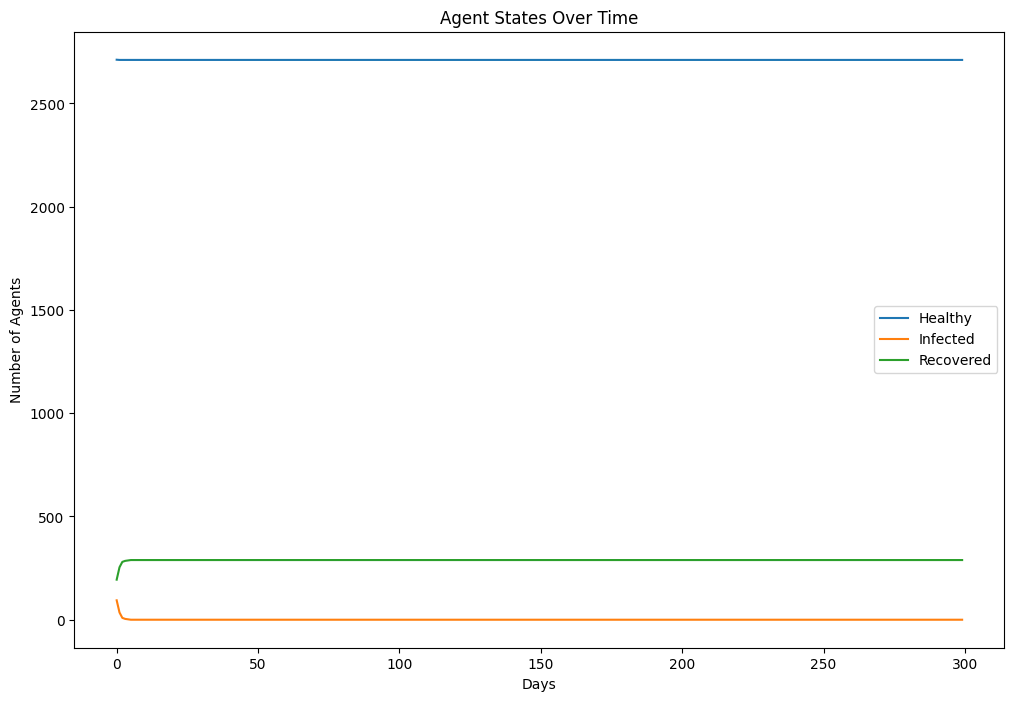

In [33]:
import matplotlib.pyplot as plt

# Initialize the model
model1 = AirportModel(3000, 30, 1748)

# Initialize lists to hold data
healthy_count = []
infected_count = []
recovered_count = []

# Run the model and collect data
for i in range(300):  # Run for 100 days
    model1.step()
    
    # Collect the current state of each agent
    agent_states1 = [agent.state for agent in model1.schedule.agents]
    
    # Count the number of agents in each state and append to lists
    healthy_count.append(agent_states1.count("Healthy"))
    infected_count.append(agent_states1.count("Infected"))
    recovered_count.append(agent_states1.count("Recovered"))

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(healthy_count, label='Healthy')
plt.plot(infected_count, label='Infected')
plt.plot(recovered_count, label='Recovered')
plt.title("Agent States Over Time")
plt.xlabel("Days")
plt.ylabel("Number of Agents")
plt.legend()
plt.show()